### This is a template car companie analysis

In this Template we take a look on 3 Big Car companies: Tesla, Ford & GM.

We go mainly with Tesla but its easy to replicate it for the other brands.

### Import Packages

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pandas.plotting import scatter_matrix

Define a start and end date

In [2]:
startdate = datetime.datetime(2017,1,1)
enddate = datetime.datetime(2021,1,1)

Downloading Tickerdata and transform it into a .csv file

In [3]:
tsla = yf.download('TSLA',start=startdate,end=enddate)
f = yf.download('F',start=startdate,end=enddate)
gm = yf.download('GM',start=startdate,end=enddate)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
tsla.to_csv('TSLA.csv')
f.to_csv('F.csv')
gm.to_csv('GM.csv')

### Read the .csv file with pandas

In [5]:
tesla = pd.read_csv('TSLA.csv')
ford = pd.read_csv('F.csv')
gm = pd.read_csv('GM.csv')

In [6]:
tesla.info()
ford.info()
gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1007 non-null   object 
 1   Open       1007 non-null   float64
 2   High       1007 non-null   float64
 3   Low        1007 non-null   float64
 4   Close      1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   Volume     1007 non-null   int64  
dtype

As can see there are no NaN or NULL entries so we can proceed

### Take the first look on the data we downloaded into the .csv file

In [7]:
tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500
1,2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500
2,2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500
3,2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500
4,2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500


In [8]:
ford.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,12.20,12.60,12.13,12.59,10.255995,40510800
1,2017-01-04,12.77,13.27,12.74,13.17,10.728470,77638100
2,2017-01-05,13.21,13.22,12.63,12.77,10.402626,75628400
3,2017-01-06,12.80,12.84,12.64,12.76,10.394480,40315900
4,2017-01-09,12.79,12.86,12.63,12.63,10.288579,39438400


In [9]:
gm.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,34.980000,35.570000,34.840000,35.150002,30.745386,10904900
1,2017-01-04,35.599998,37.240002,35.470001,37.090000,32.442287,23388500
2,2017-01-05,37.009998,37.049999,36.070000,36.389999,31.830004,15636700
3,2017-01-06,36.410000,36.549999,35.930000,35.990002,31.480129,13240100
4,2017-01-09,36.119999,36.529999,35.860001,36.009998,31.497622,15204500


In [10]:
tesla['Date'].min(), tesla['Date'].max()

('2017-01-03', '2020-12-31')

In [11]:
tesla = tesla.set_index('Date')
ford = ford.set_index('Date')
gm = gm.set_index('Date')

In [12]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1007 entries, 2017-01-03 to 2020-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1007 non-null   float64
 1   High       1007 non-null   float64
 2   Low        1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Adj Close  1007 non-null   float64
 5   Volume     1007 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 55.1+ KB


### All 3 stocks in comparison from 2010 to 2021

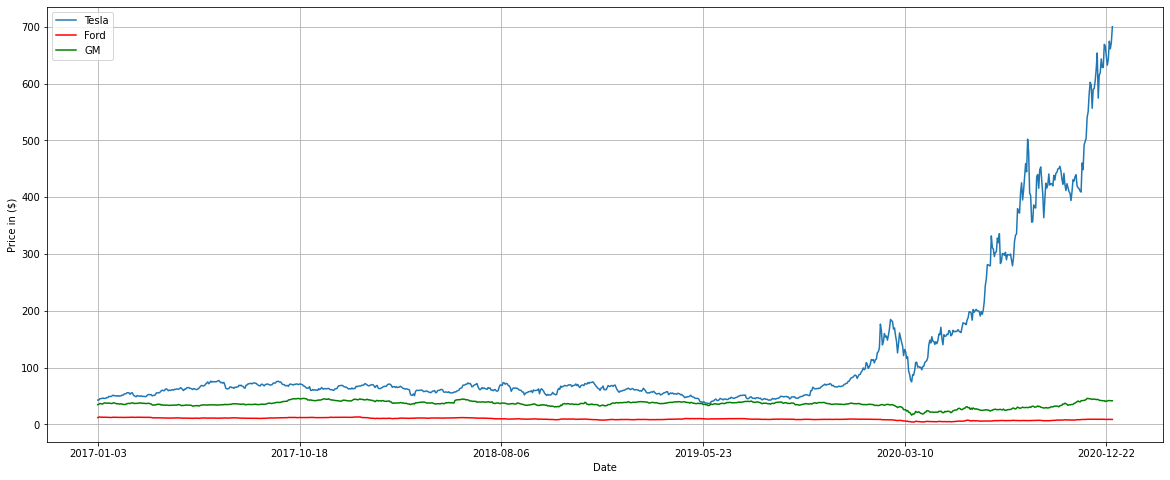

In [13]:
tesla['Open'].plot(figsize=(20,8), label='Tesla')
ford['Open'].plot(c='red', label='Ford')
gm['Open'].plot(c='green', label='GM')
plt.xlabel('Date')
plt.ylabel('Price in ($)')
plt.legend()
plt.grid()
plt.show()

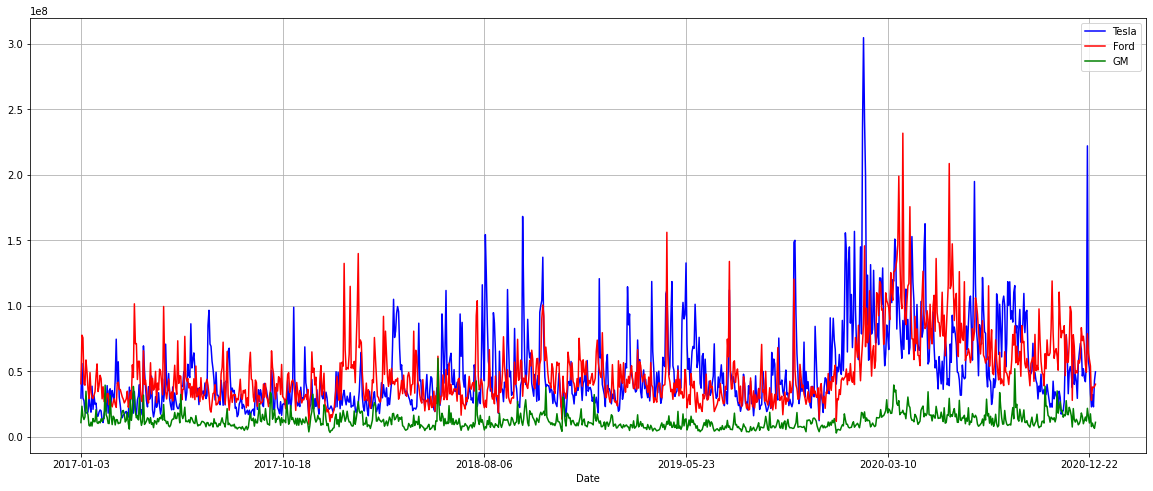

In [14]:
tesla['Volume'].plot(c='blue',figsize=(20,8), label='Tesla')
ford['Volume'].plot(c='red', label='Ford')
gm['Volume'].plot(c='green', label='GM')
plt.grid()
plt.legend()
plt.show()

In [15]:
tesla.iloc[[tesla['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-04,176.591995,193.798004,166.776001,177.412003,177.412003,304694000


In [16]:
tesla['Volume'].argmax()

776

In [17]:
ford.iloc[[ford['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-03-31,5.03,5.19,4.75,4.83,4.83,231800800


In [18]:
ford['Volume'].argmax()

815

In [19]:
gm.iloc[[gm['Volume'].argmax()]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-31,41.650002,42.77,41.27,42.700001,39.287525,59937500


In [20]:
gm['Volume'].argmax()

354

This is the Volume spike which our earlier argmax() function told us to look at.

We can navigate with the iloc function (Example: 1:252 is 1 Year as a Year has 252 TradingDays.

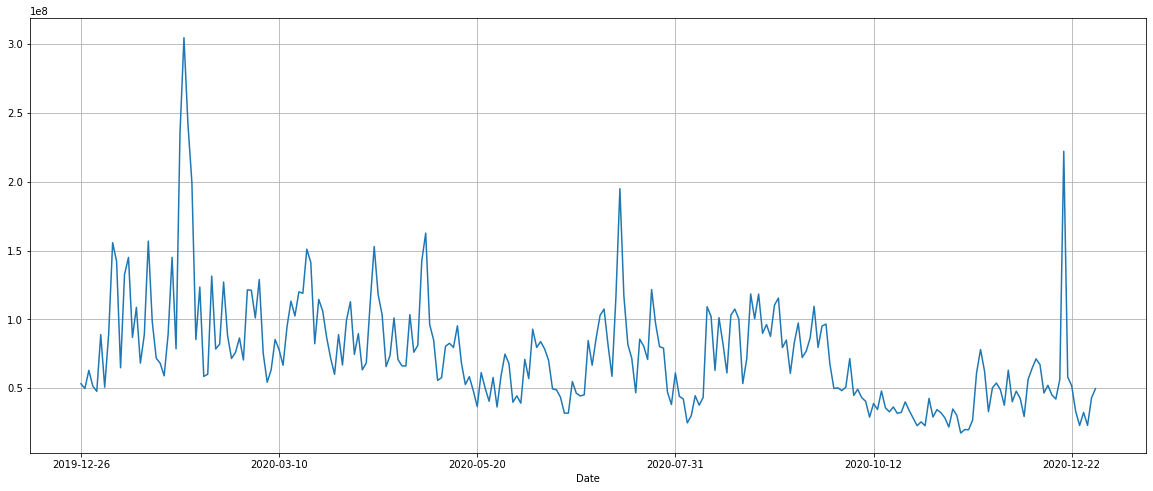

In [21]:
tesla.iloc[750:]['Volume'].plot(figsize=(20,8))
plt.grid()
plt.show()

### Adding a MarketCap column

In [22]:
tesla['MarketCap'] = tesla['Open'] * tesla['Volume']
ford['MarketCap'] = ford['Open'] * ford['Volume']
gm['MarketCap'] = gm['Open'] * gm['Volume']

In [23]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,MarketCap
Date,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,1.272680e+09
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2.408099e+09
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,1.338527e+09
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,1.254446e+09
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,9.111861e+08


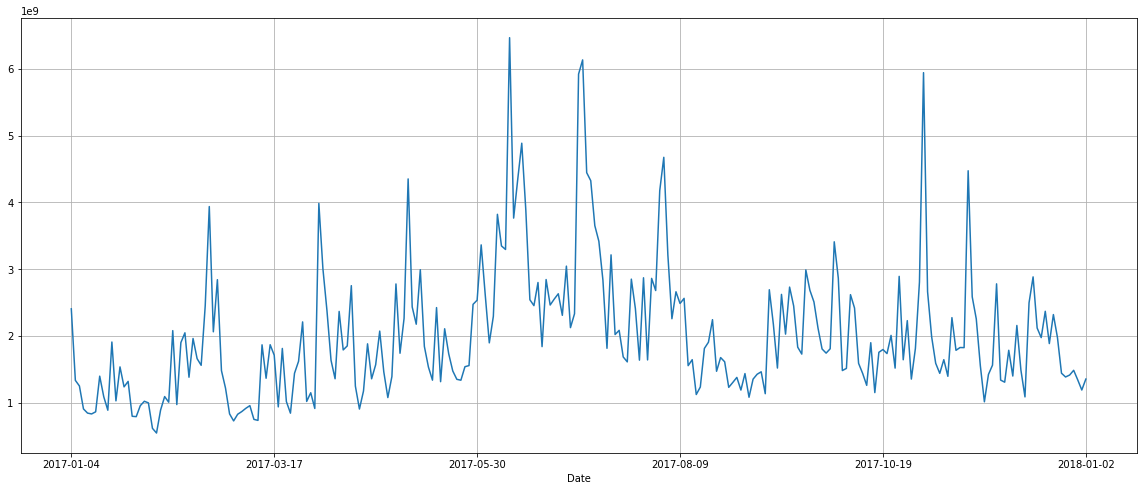

In [33]:
tesla.iloc[1:252]['MarketCap'].plot(figsize=(20,8))
plt.grid()

### Plotting the Moving Average

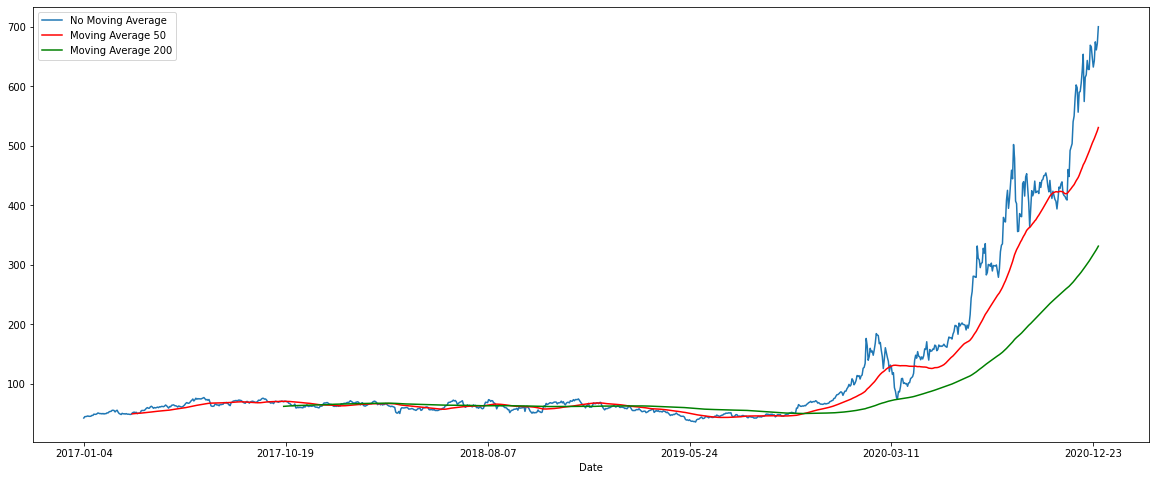

In [34]:
tesla.iloc[1:]['Open'].plot(figsize=(20,8), label='No Moving Average')
tesla['MA50'] = tesla['Open'].rolling(50).mean()
tesla.iloc[1:]['MA50'].plot(label='Moving Average 50', c='red')
tesla['MA200'] = tesla['Open'].rolling(200).mean()
tesla.iloc[1:]['MA200'].plot(label='Moving Average 200', c='green')
plt.legend()

### Showing possible correlation

In [26]:
companies = pd.concat([tesla['Open'], ford['Open'], gm['Open']], axis=1)
companies.columns = ['Tesla Open', 'Ford Open', 'GM Open']

In [27]:
companies.head()

,Tesla Open,Ford Open,GM Open
Date,,,
2017-01-03,42.972000,12.20,34.980000
2017-01-04,42.950001,12.77,35.599998
2017-01-05,45.284000,13.21,37.009998
2017-01-06,45.386002,12.80,36.410000
2017-01-09,45.793999,12.79,36.119999


array([[<AxesSubplot:xlabel='Tesla Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Tesla Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Tesla Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='Ford Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='Ford Open'>],
       [<AxesSubplot:xlabel='Tesla Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='Ford Open', ylabel='GM Open'>,
        <AxesSubplot:xlabel='GM Open', ylabel='GM Open'>]], dtype=object)

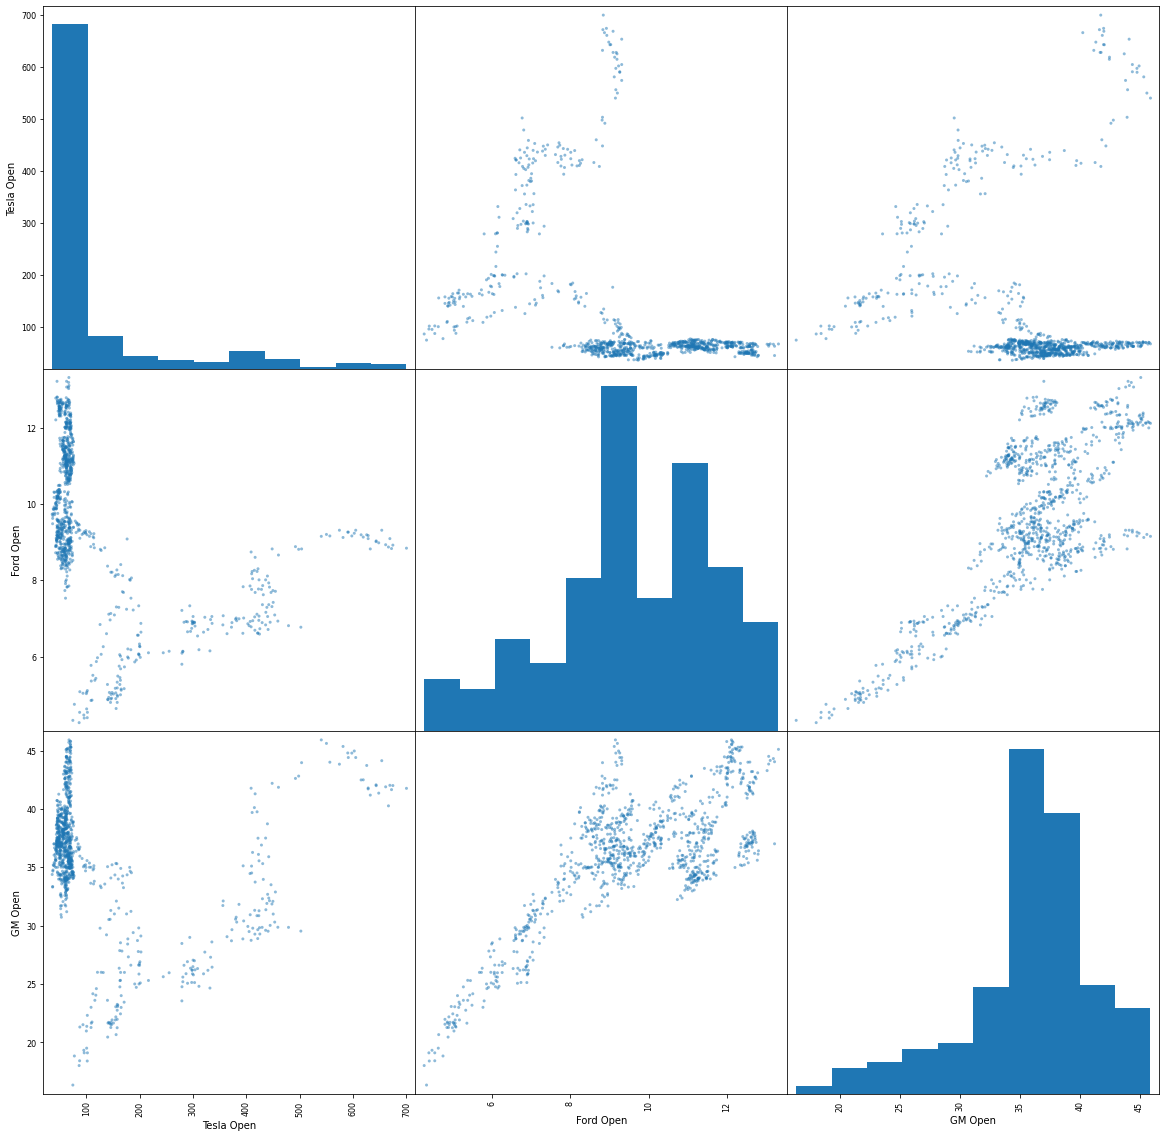

In [28]:
scatter_matrix(companies, figsize=(20,20))

### Adding Returns column

In [29]:
tesla['Returns'] = (tesla['Close']/tesla['Close'].shift(1)) - 1
ford['Returns'] = (ford['Close']/ford['Close'].shift(1)) - 1
gm['Returns'] = (gm['Close']/gm['Close'].shift(1)) - 1

In [30]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume,MarketCap,MA50,MA200,Returns
Date,,,,,,,,,,
2017-01-03,42.972000,44.066002,42.192001,43.397999,43.397999,29616500,1.272680e+09,NaN,NaN,NaN
2017-01-04,42.950001,45.599998,42.862000,45.397999,45.397999,56067500,2.408099e+09,NaN,NaN,0.046085
2017-01-05,45.284000,45.495998,44.389999,45.349998,45.349998,29558500,1.338527e+09,NaN,NaN,-0.001057
2017-01-06,45.386002,46.062000,45.090000,45.801998,45.801998,27639500,1.254446e+09,NaN,NaN,0.009967
2017-01-09,45.793999,46.383999,45.599998,46.256001,46.256001,19897500,9.111861e+08,NaN,NaN,0.009912


<AxesSubplot:xlabel='Date'>

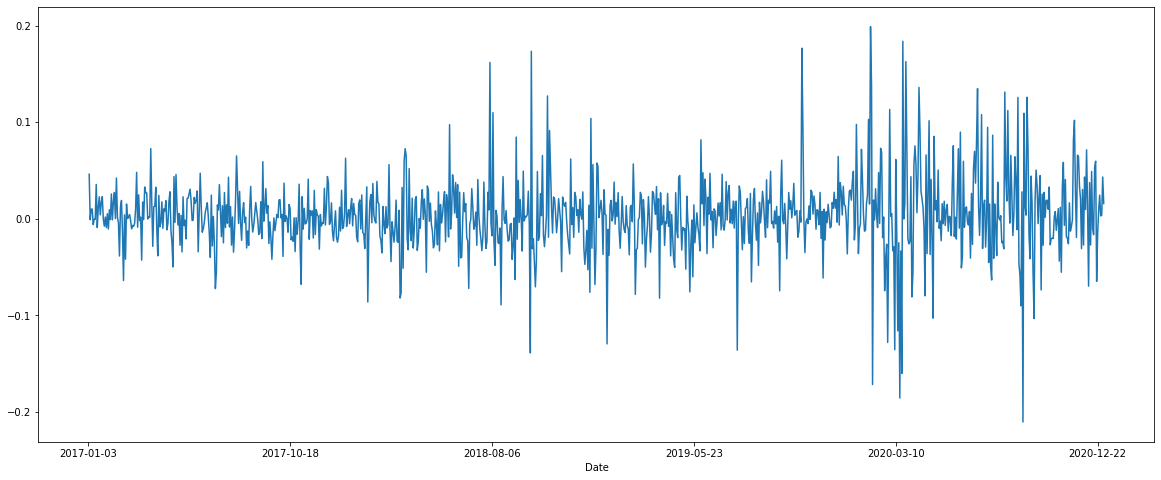

In [31]:
tesla['Returns'].plot(figsize=(20,8))

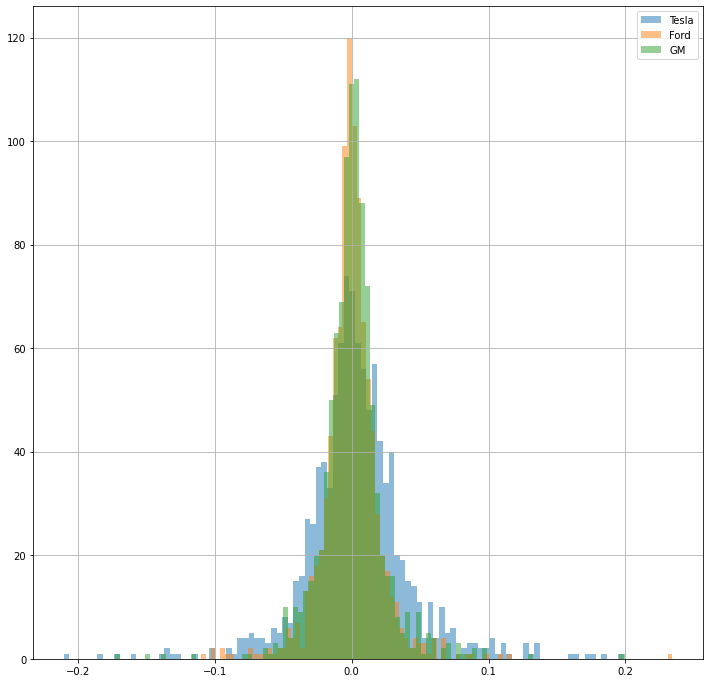

In [32]:
tesla['Returns'].hist(bins=100, alpha=0.5, label='Tesla', figsize=(12,12))
ford['Returns'].hist(bins=100, alpha=0.5, label='Ford')
gm['Returns'].hist(bins=100, alpha=0.5, label='GM')
plt.legend()